# Forecasting Stocks with ARIMA

This project delves into predicting the future stock prices of Apple using the ARIMA (AutoRegressive Integrated Moving Average) model. It comprises an exploratory analysis phase where historical data is examined, followed by the construction of the ARIMA model for forecasting. The final section evaluates the model's accuracy in predicting Apple's stock prices against actual values. Dive into the analysis to gain insights into Apple's stock trends and the efficacy of ARIMA modeling for forecasting.

The methodology employed in this project can be adapted and applied to analyze the performance of other stocks or even cryptocurrencies with minor adjustments.

Dataset: Datas were extracted using YFinance library.

# Summary

### Chapter 1: Exploratory Analysis
- 1.1: Importing Data and First Look
- 1.2: Visualization of Apple Stocks Price History in USD

### Chapter 2: Building ARIMA Model
- 2.1: Splitting Data
- 2.2: Time Series Forecasting with ARIMA Model 

### Chapter 3: Conclusion
- 3.1: Apple Stocks Price Prediction Comparison: Predicted vs. Actual
- 3.2: MAE
- 3.3: MAPE
- 3.4: RMSE

# Chapter 1 - Exploratory Analysis

In this chapter, we begin by importing data using the yfinance library to fetch historical price data of Apple Stocks in USD. The downloaded data is stored in a DataFrame named df. Subsequently, a line plot is generated to visualize the adjusted closing prices of Apple Stocks over time. This initial exploration provides a foundational understanding of the data and sets the stage for further analysis and modeling.

In [16]:
import yfinance as yf
import numpy as np   
import matplotlib.pyplot as plt 

### 1.1: Importing Data and First Look

In [17]:
# We'll start downloading historical stock price data for the company Apple (ticker symbol AAPL) using the Yahoo Finance API.
apple_df = yf.download('AAPL')

# Let's check the first and last lines of our datas
apple_df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
...,...,...,...,...,...,...
2024-04-22,165.520004,167.259995,164.770004,165.839996,165.839996,48116400
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800


This dataset contains historical daily stock price data for Apple Inc. (AAPL) retrieved from Yahoo Finance using the yfinance library. It includes the following columns:

- Date: The date of the trading day.
- Open: The opening price of the stock.
- High: The highest price of the stock during the trading day.
- Low: The lowest price of the stock during the trading day.
- Close: The closing price of the stock.
- Adj Close: The adjusted closing price of the stock, which accounts for any corporate actions such as dividends or stock splits.
- Volume: The trading volume, i.e., the number of shares traded during the day.

The dataset spans from December 12, 1980, to February 23, 2024, with a total of 10,890 rows. It provides valuable insights into the historical performance and trading activity of Apple's stock.

### 1.2: Visualization of Apple Stocks Price History in USD

Here, we can observe the behavior of Apple Inc. stock prices over the years.

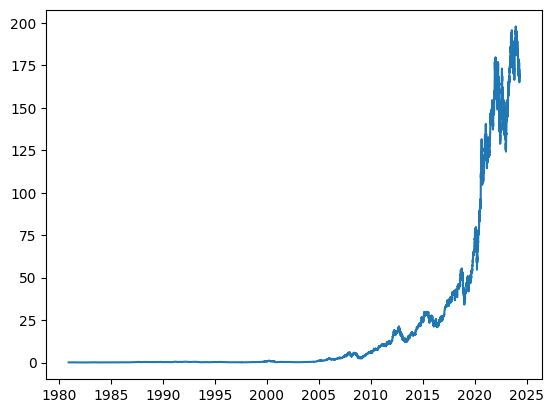

In [18]:
plt.plot(apple_df.index, apple_df['Adj Close'])

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('apple_stock_price.png', bbox_inches='tight')

plt.show()


We can observe a significant surge in stock prices just before 2010, followed by a consistent exponential increase in Apple's share prices ever since.

# 2 - Building ARIMA Model

We will split the data into training and testing sets, using an ARIMA(4,1,0) model to make time series predictions on the test data. It iterates over each test observation, fitting the ARIMA model with the available training data, making predictions for observation.

### 2.1: Splitting Data

Since we have data covering a lengthy period, we'll allocate 95% of it for training purposes and reserve the final 5% for testing.

In [19]:
# train test split
to_row = int(len(apple_df)*0.95)

training_data = list(apple_df[0:to_row]['Adj Close'])
testing_data = list(apple_df[to_row:]['Adj Close'])

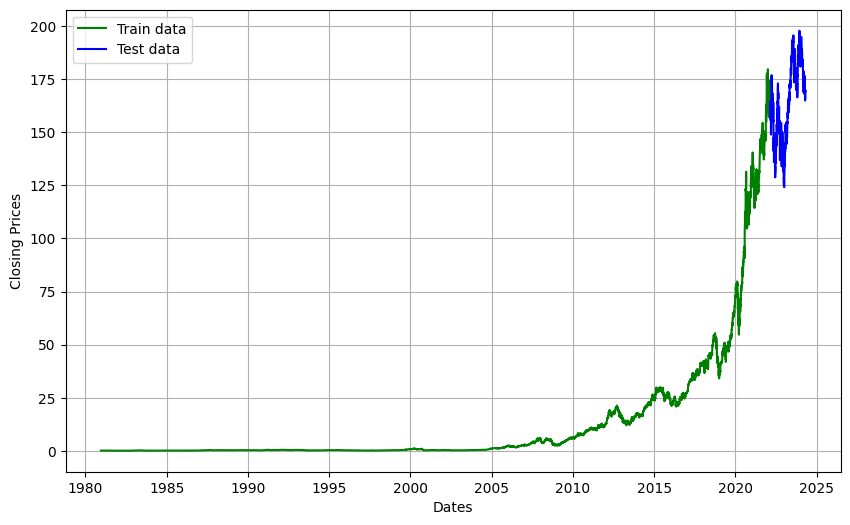

In [20]:
# Split data into train and testing set
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(apple_df[0:to_row]['Adj Close'],'green', label='Train data')
plt.plot(apple_df[to_row:]['Adj Close'], 'blue', label='Test data')
plt.legend()

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('apple_train_test.png', bbox_inches='tight')

In this graph, we can observe the demarcation between the training data (green line) and the test data (blue line).

In [21]:
model_predictions = []
n_test_obser = len(testing_data)
n_test_obser

547

### 2.2: Time Series Forecasting with ARIMA Model 


In the code below, the "(4,1,0)" represents the order of the ARIMA model. In an ARIMA(p,d,q) model:

- "p" stands for the order of the autoregressive (AR) term.
- "d" stands for the number of non-seasonal differences needed to make the series stationary.
- "q" stands for the order of the moving average (MA) term.

In the specific case of the (4,1,0) model:

- "p = 4": Indicates that the model uses the four previous values of the time series to predict the next value.
- "d = 1": Refers to a first-order differencing, indicating that the time series has been differenced once to make it stationary.
- "q = 0": Indicates that the model does not include moving average terms in the prediction.

In [22]:
import statsmodels.api as sm

for i in range(n_test_obser):
    # Fit ARIMA model to training data with order (4,1,0)
    model = sm.tsa.ARIMA(training_data, order=(4,1,0))
    model_fit = model.fit()
    
    # Forecast next observation
    output = model_fit.forecast()
    yhat = list(output)
    
    # Append prediction to list of model predictions
    model_predictions.append(yhat)
    
    # Get actual test value for comparison
    actual_test_value = testing_data[i]
    # Append actual test value to training data for next iteration
    training_data.append(actual_test_value)

In [ ]:
# import pickle

# # Save the trained model to a file
# with open('apple_arima_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In summary, the ARIMA (4,1,0) model is a model that uses the last four values of the differenced time series to predict the next value.

Now, we're gonna print the summary of the fitted ARIMA model, providing detailed information about the model's coefficients, statistical metrics, and diagnostic tests.

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                10934
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -13697.505
Date:                Mon, 29 Apr 2024   AIC                          27405.010
Time:                        12:52:53   BIC                          27441.507
Sample:                             0   HQIC                         27417.309
                              - 10934                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0263      0.003     -9.430      0.000      -0.032      -0.021
ar.L2         -0.0219      0.003     -7.667      0.000      -0.027      -0.016
ar.L3         -0.0146      0.003     -4.750      0.0


It seems there was a labeling error in the output. Despite being labeled as "SARIMAX Results," the displayed summary actually corresponds to an ARIMA model. This summary includes information such as the model coefficients, standard errors, t-values, p-values, AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and other statistical metrics. It provides a comprehensive overview of how well the ARIMA model fits the training data and helps evaluate its performance.

In [ ]:
len(model_predictions)

547

# 3 - Conclusion

Finnaly, we'll be evaluating the results of the ARIMA model prediction.

### 3.1: Apple Stocks Price Prediction Comparison: Predicted vs. Actual

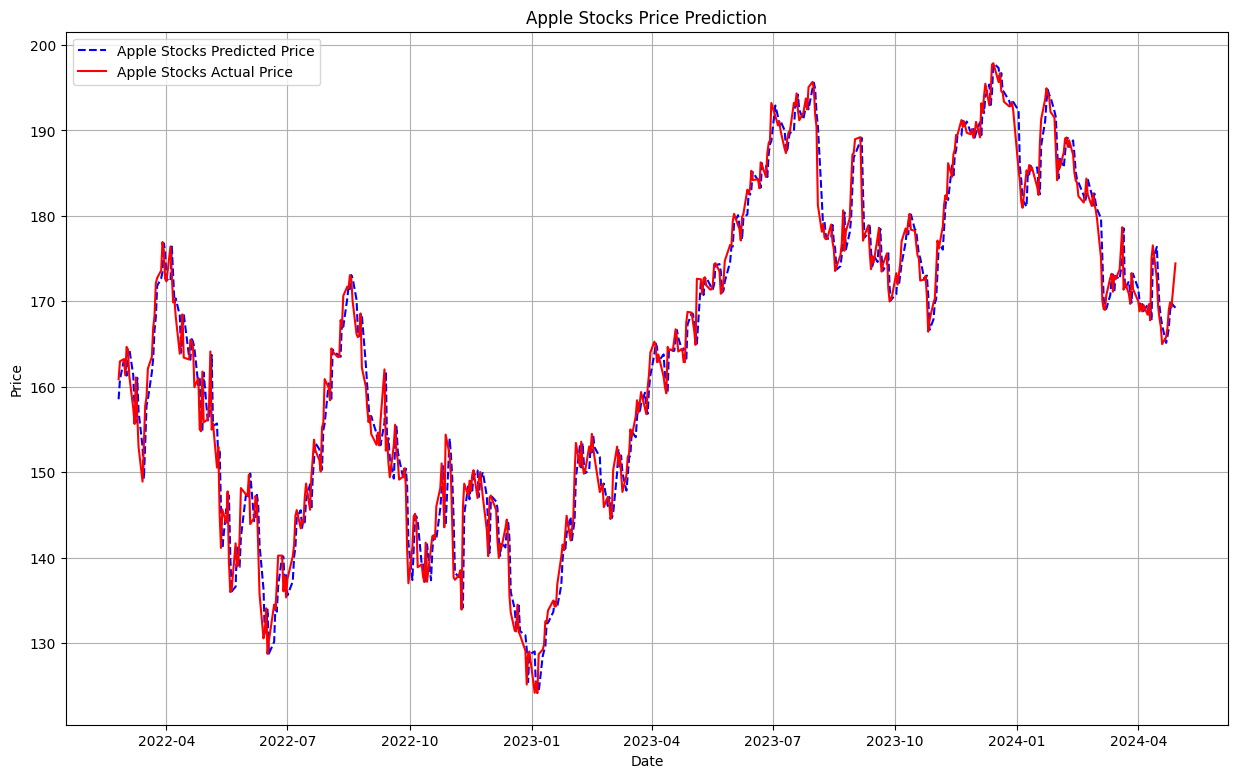

In [ ]:
plt.figure(figsize=(15, 9))
plt.grid(True)

date_range = apple_df[to_row:].index

# Adjust the slicing to match the length of date_range
plt.plot(date_range, model_predictions, color='blue', linestyle='dashed', label='Apple Stocks Predicted Price')
plt.plot(date_range, testing_data, color='red', label='Apple Stocks Actual Price')

plt.title('Apple Stocks Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# # Save the plot as an image file (e.g., PNG)
# plt.savefig('apple_predictedxactual_values.png', bbox_inches='tight')

plt.show()

The forecasted prices appear to closely match the actual prices.

### 3.2: MAE

MAE (Mean Absolute Error) is a common evaluation metric in forecasting problems, measuring the average of the absolute differences between a model's predictions and the actual values


In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(testing_data, model_predictions[:len(date_range)])
print(f'MAE: {mae}')

MAE: 2.102515556511991


Between the actual testing data and the forecasted model predictions. The obtained MAE value is approximately 2.125.

### 3.3: MAPE


MAPE (Mean Absolute Percentage Error) is a performance metric used in forecasting, representing the average absolute percentage difference between the model's predictions and the actual values. It provides insight into the accuracy of the forecasts, with lower values indicating better performance.

In [ ]:
# Report performance
mape = np.mean(np.abs(np.array(model_predictions[:-1]) - np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+str(mape)) 

MAPE: 0.13020430210737763


The MAPE value of approximately 0.130 means that, on average, the model's predictions have an absolute difference of about 13.02% from the actual values. In other words, on average, the model's predictions have an accuracy of approximately 86.98%.

### 3.4: RMSE


RMSE (Root Mean Squared Error) is a commonly used metric in forecasting and regression analysis. It measures the average magnitude of the errors between predicted values and actual values, taking into account both the magnitude and direction of the errors. RMSE is calculated by taking the square root of the average of the squared differences between the predicted and actual values. It provides insight into the typical deviation of the predictions from the actual values, with lower RMSE values indicating better model performance.

In [ ]:
from sklearn.metrics import mean_squared_error

mse_value = mean_squared_error(testing_data, model_predictions)
rmse = np.sqrt(mse_value)
print(f'RMSE: {rmse}')

RMSE: 2.766556589622288



This code calculates the Root Mean Squared Error (RMSE) between the actual testing data and the forecasted model predictions. The obtained RMSE value is approximately 2.806.